In [3]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

## Q1. Para a rede do livro "Os miseráveis" (base lesmis), calcule o terceiro e quarto momento do grau.

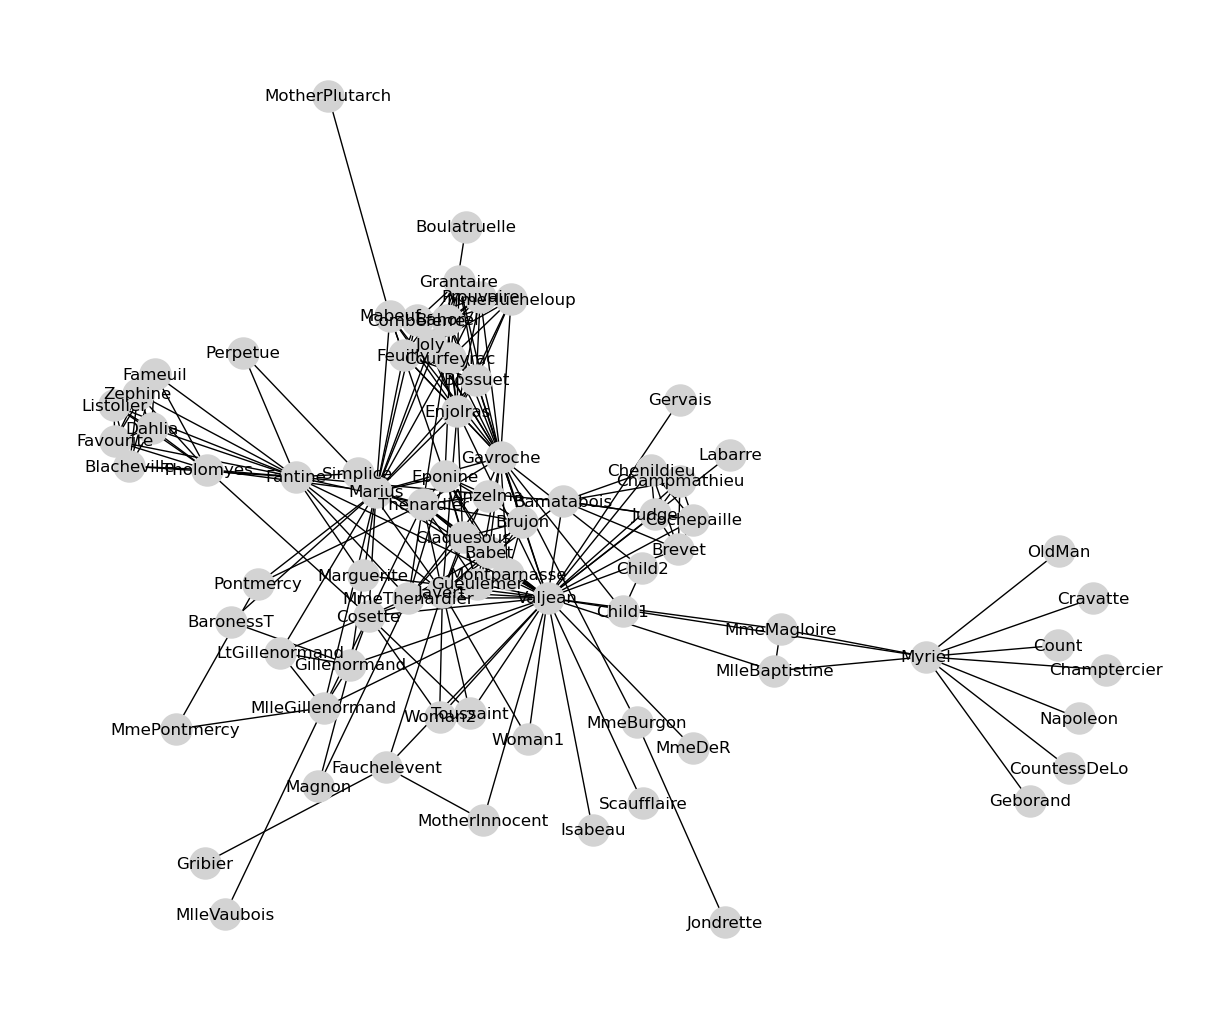

In [4]:
G= nx.read_gml('/Users/yusukehayashibara/Downloads/data2/lesmis.gml')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [9]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

In [15]:
print('Terceiro momento de k:', momment(G,3))
print('Quarto momento de k:', momment(G,4))

Terceiro momento de k: 1408.025974025974
Quarto momento de k: 33592.72727272727


## Q2. Implemente uma rotina para calcular a medida de complexidade. Qual o valor da complexidade para a rede de energia elétrica dos EUA (Base powergrid).

O coeficiente de complexidade é dado por:

$$
\alpha = \frac{\langle k^2 \rangle}{\langle k \rangle}
$$

Ou seja, a razão entre o segundo momento do grau e o grau médio.
Quanto maior o coeficiente de complexidade, pode-se afiramar que existe uma maior variabilidade dos Hubs.

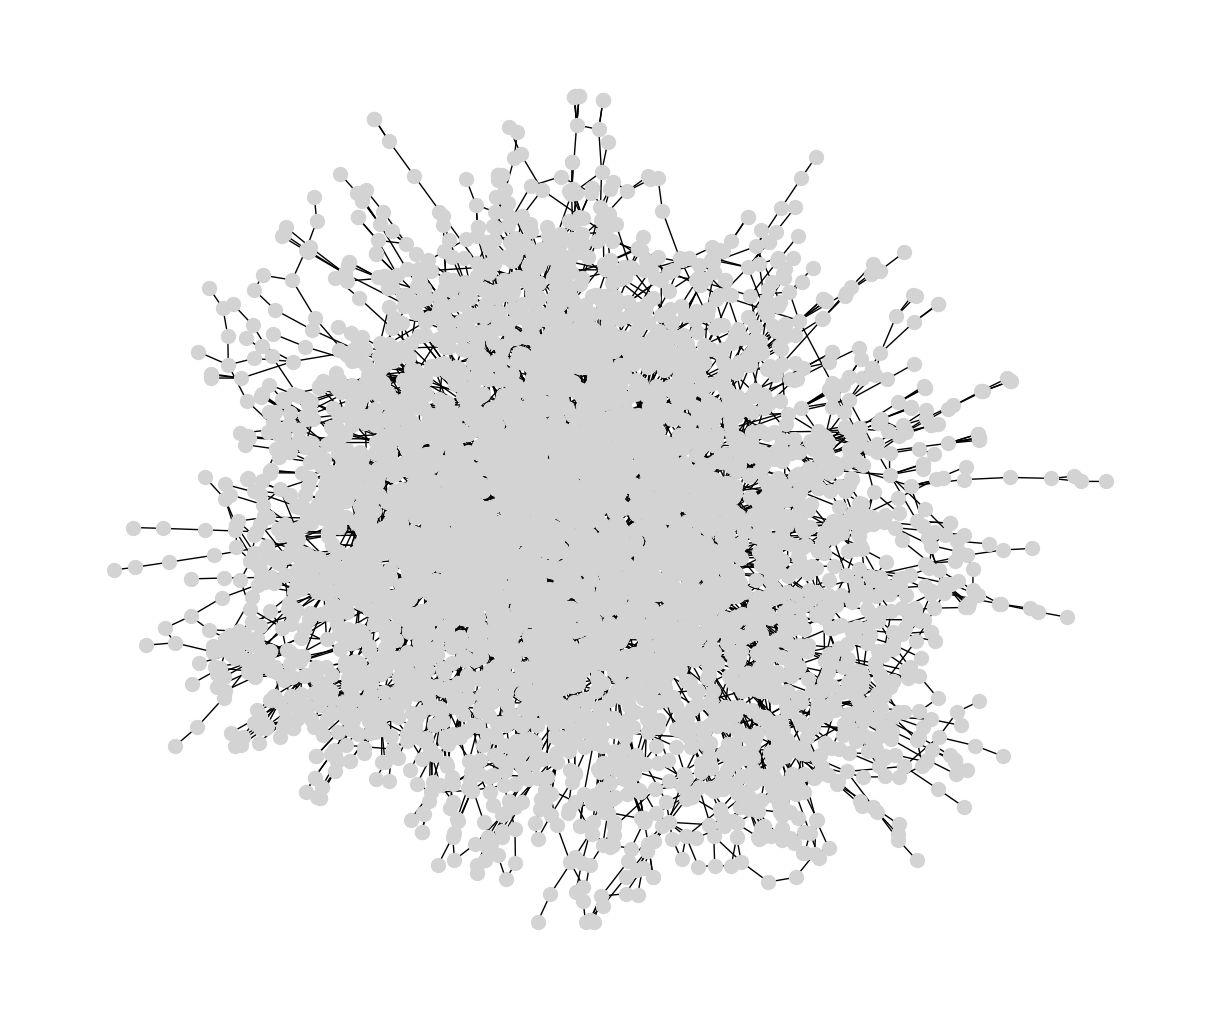

In [40]:
G2 = nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2/powergrid.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="lightgray", node_size=100, with_labels=False)

In [44]:
def complexity_coefficient(G):
    k2 = momment(G, 2)
    k = momment(G, 1)
    return (k2/k)

In [46]:
print ('Coeficiente de complexidade:', complexity_coefficient(G2))

Coeficiente de complexidade: 3.8712465878070974


## Q3. Implemente uma rotina para calcular a entropia de Shannon e calcule essa medida para a base de estradas da Europa (base euroroad).

A entropia de Shannon é máxima para uma distribuição uniforme, ou seja a probabilidade de ocorrência de grau é uniforme.
Enquanto numa rede onde todos os vértices possuem o mesmo grau, não precisamos de muita informação para descrever a rede, então a entalpia é mínima. A entropia diz o quanto de informação é preciso para descrever a rede.


In [49]:
#leitura da rede Euroroad
G3 = nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2/euroroad.txt')

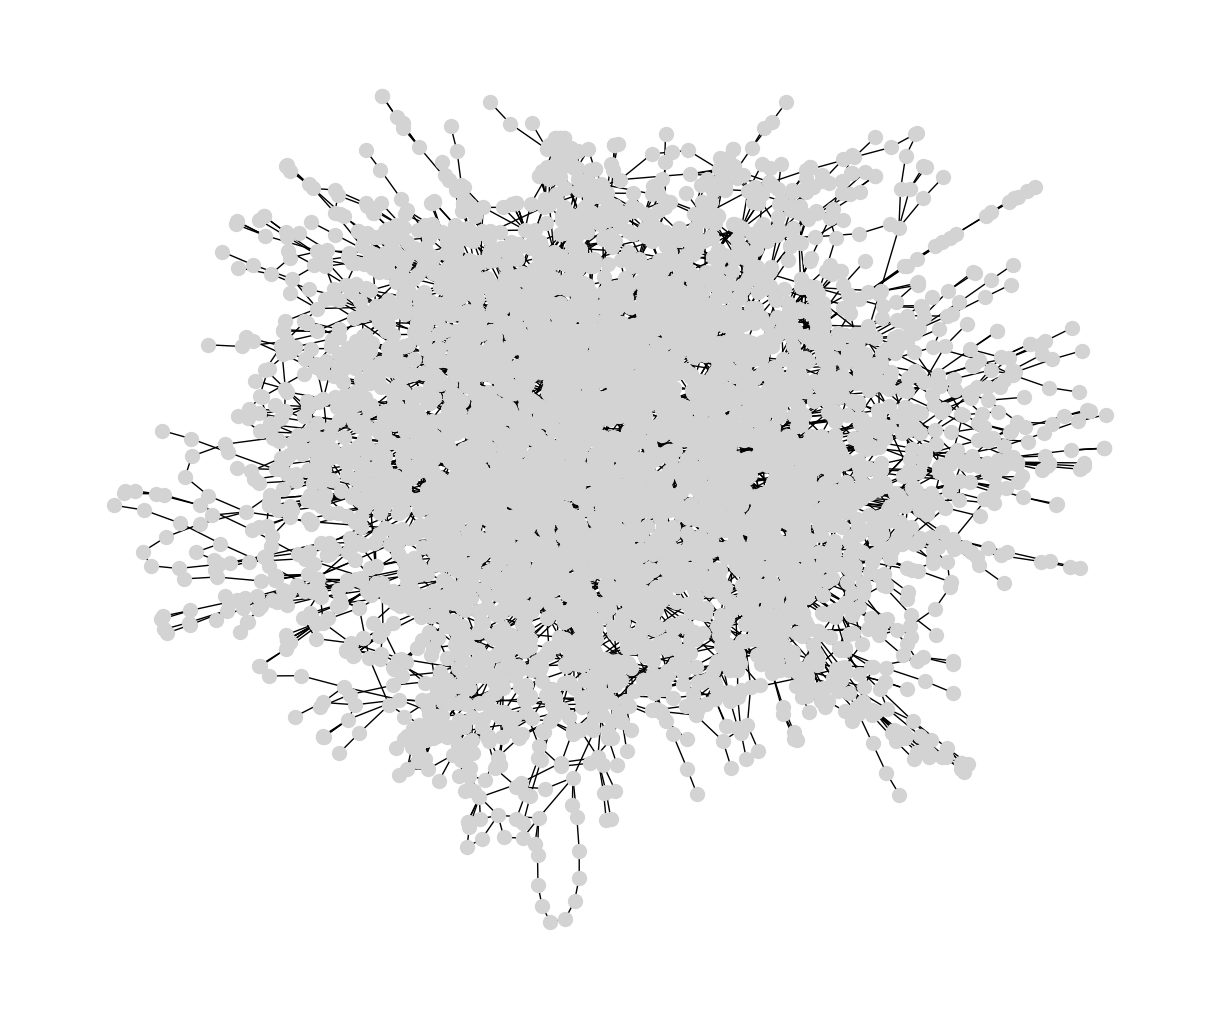

In [51]:
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="lightgray", node_size=100, with_labels=False)

In [59]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G3)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  2.0033


## Q4. Calcule as medidas transitivity e average clustering coefficient para a base de dados de aeroportos do EUA (base usairport).

In [70]:
G4 = nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2/usairport.txt', nodetype=str, data=(("weight", float),))

In [74]:
print('Medida de transitividade:', (nx.transitivity(G4)))
print('Average Clustering:', nx.average_clustering(G4))

Medida de transitividade: 0.38414344664491556
Average Clustering: 0.504152539209577


## Q5. Calcule o coeficiente de complexidade e a entropia de Shannon para a rede de aeroportos dos EUA (base usairport).

In [77]:
print('Coeficiente de Complexidade:', complexity_coefficient(G4))
print('Entropia de Shannon:', shannon_entropy(G4))

Coeficiente de Complexidade: 112.22224803950043
Entropia de Shannon: 4.985977646539227
